<h1> Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-моделей-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-моделей-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение моделей прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выбор модели</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов-сети-фитнес-центра" data-toc-modified-id="Кластеризация-клиентов-сети-фитнес-центра-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов сети фитнес-центра</a></span></li><li><span><a href="#Графики-визуализируют-ранее-описанные-профили-клиентов-сети-фитнес-центров-&quot;Культурист-датасаентист&quot;:" data-toc-modified-id="Графики-визуализируют-ранее-описанные-профили-клиентов-сети-фитнес-центров-&quot;Культурист-датасаентист&quot;:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Графики визуализируют ранее описанные профили клиентов сети фитнес-центров "Культурист-датасаентист":</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

## Введение

### Задача

Спрогнозировать отток клиентов фитнес-зала

## Загрузка данных

In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
import sklearn.metrics as metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Отключение сообщений об ошибках
import warnings
warnings.filterwarnings('ignore')
# Повышение качества отрисовки графиков
%config InlineBackend.figure_format = 'retina'
# Форматирование чисел
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:

    'gender' — пол;
    'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    'Phone' — наличие контактного телефона;
    'Age' — возраст;
    'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

    'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    'Group_visits' — факт посещения групповых занятий;
    'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    'Churn' — факт оттока в текущем месяце.

In [2]:
# загружаем датасет
df = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [3]:
#циклом выведем базовую инфу по таблице
tabs = [df]
for tab in tabs:
    tab.info()
    print('названия столбцев', tab.columns)
    print('размер таблицы:', tab.shape)
    print('количество пропусков:', '\n', tab.isna().sum())
    print('количество явных дубликатов:', tab.duplicated().sum())
    display(tab.head(3))
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0


In [4]:
# Переименование столбцов
df = df.rename(columns={
    'Near_Location': 'location',
    'Promo_friends': 'promo',
    'Contract_period': 'period',
    'Group_visits': 'groups',
    'Month_to_end_contract': 'end_month',
    'Avg_class_frequency_total': 'avg_freq_total',
    'Avg_class_frequency_current_month': 'avg_freq_month',
    'Avg_additional_charges_total': 'avg_revenue'
})

In [5]:
# Приведение наименований столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
location,4000.00,0.84,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.00,0.90,0.29,0.00,1.00,1.00,1.00,1.00
period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
groups,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_revenue,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
end_month,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Среднестатистический клиент нашего фитнес клуба это в равной доли парень или девушка, 29 лет, живущий или работающий в одном районе с клубом, посещая его в среднем от 1 до 2 раз, и на протяжении уже более 3 месяцев.

Пропущенных строк нет в датасете, все данные количественные. Отсуствующих значений не замечаю, минимальные данные в норме анализирую дальше

дубликатов в данных нет

In [7]:
# средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
df_mean = df.groupby('churn').mean()
df_mean

,gender,location,partner,promo,phone,period,groups,age,avg_revenue,end_month,lifetime,avg_freq_total,avg_freq_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


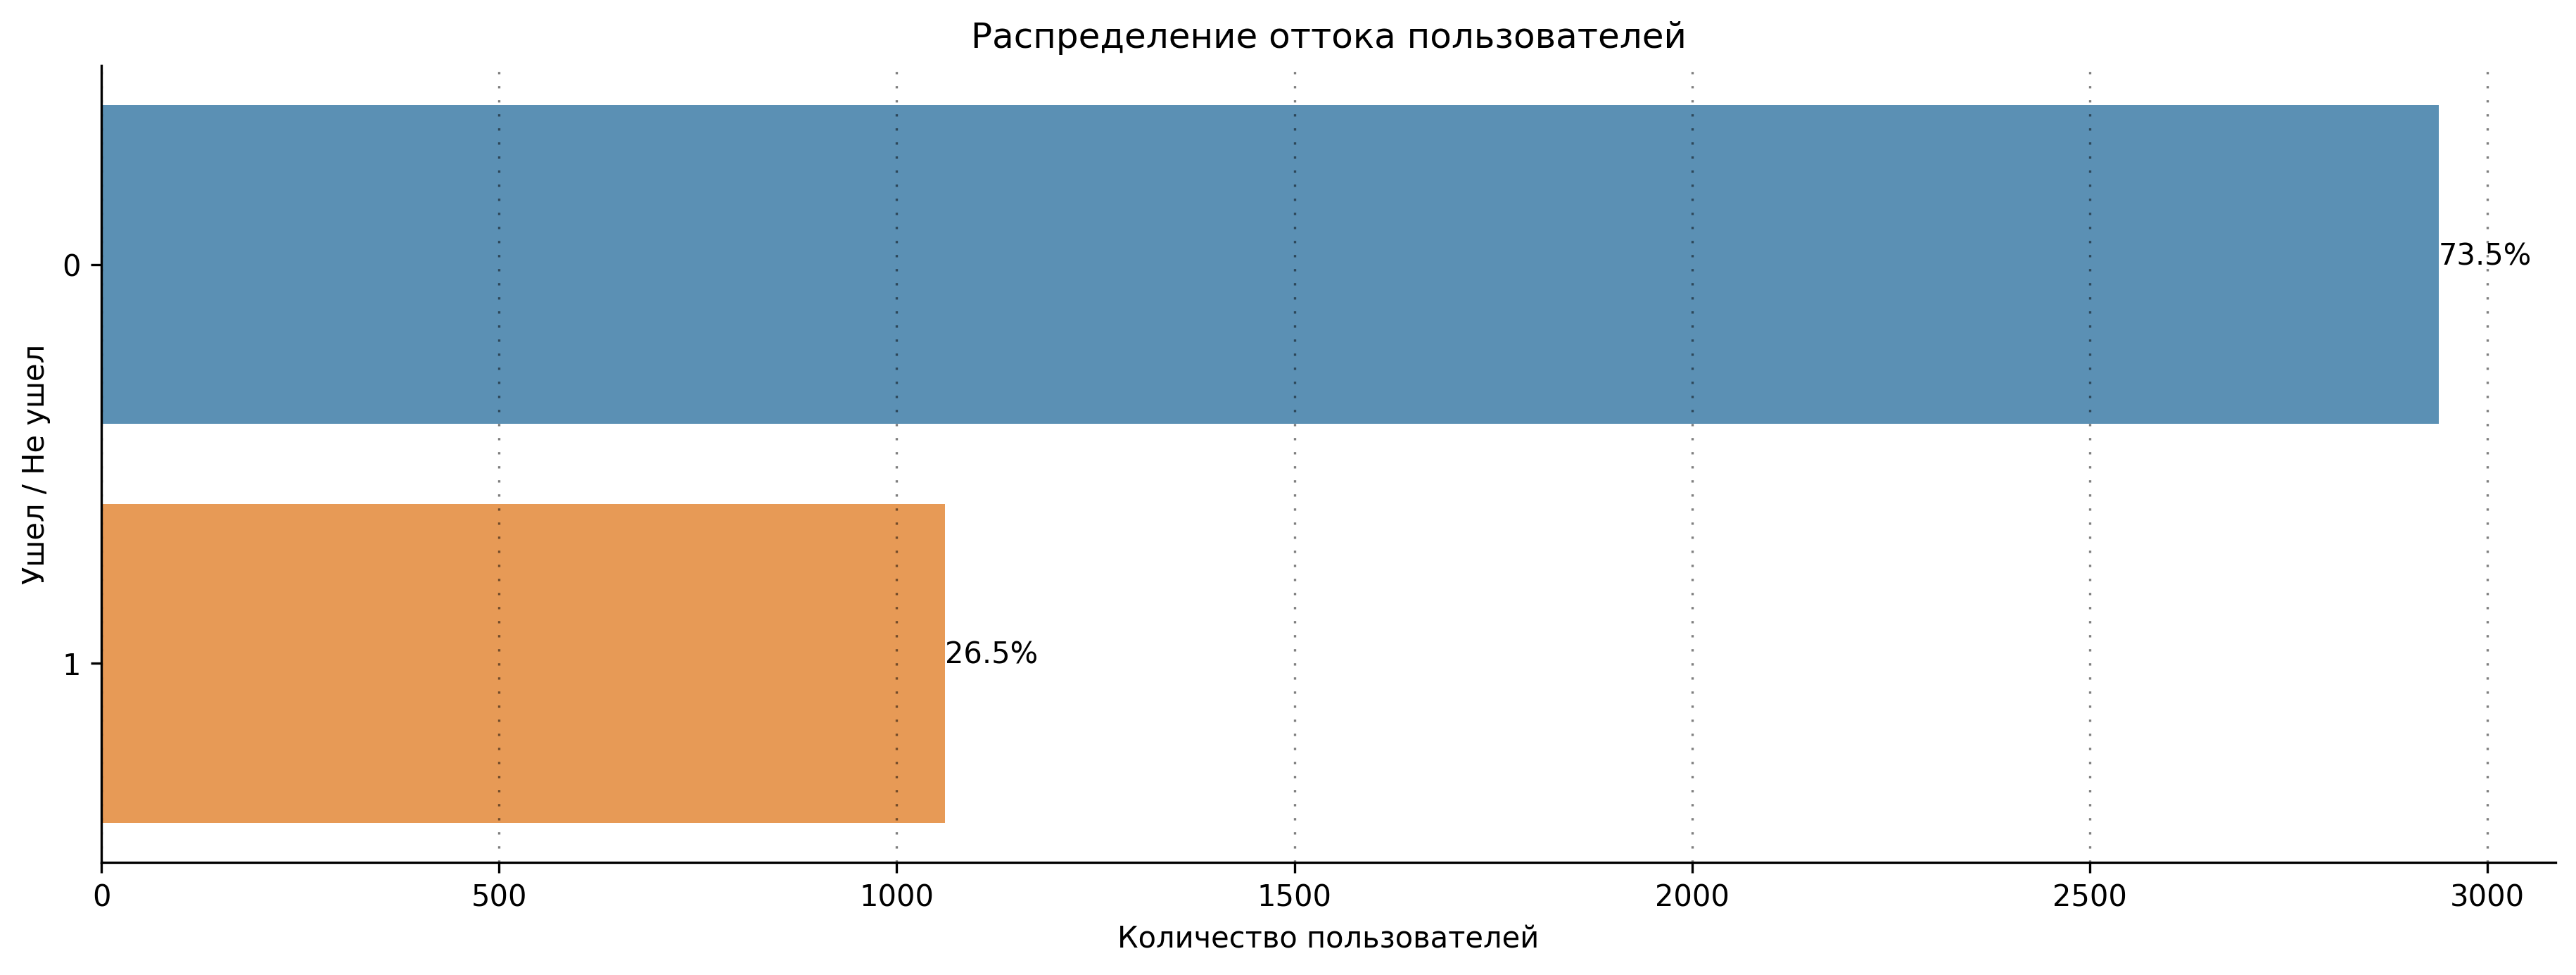

In [8]:
# построим гистограммы
fig = plt.figure(figsize=(15, 5), dpi=150)
ax = sns.countplot(y='churn', data=df, alpha=0.8)
total =  df.shape[0]
ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax.set_title('Распределение оттока пользователей')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Ушел / Не ушел')
sns.despine()
plt.show()


In [9]:
# посмотрю как распределяются другие булевые метрики. Есть ли дисбаланс
bool_cols = ('gender', 'location', 'partner', 'promo', 'phone', 'groups')

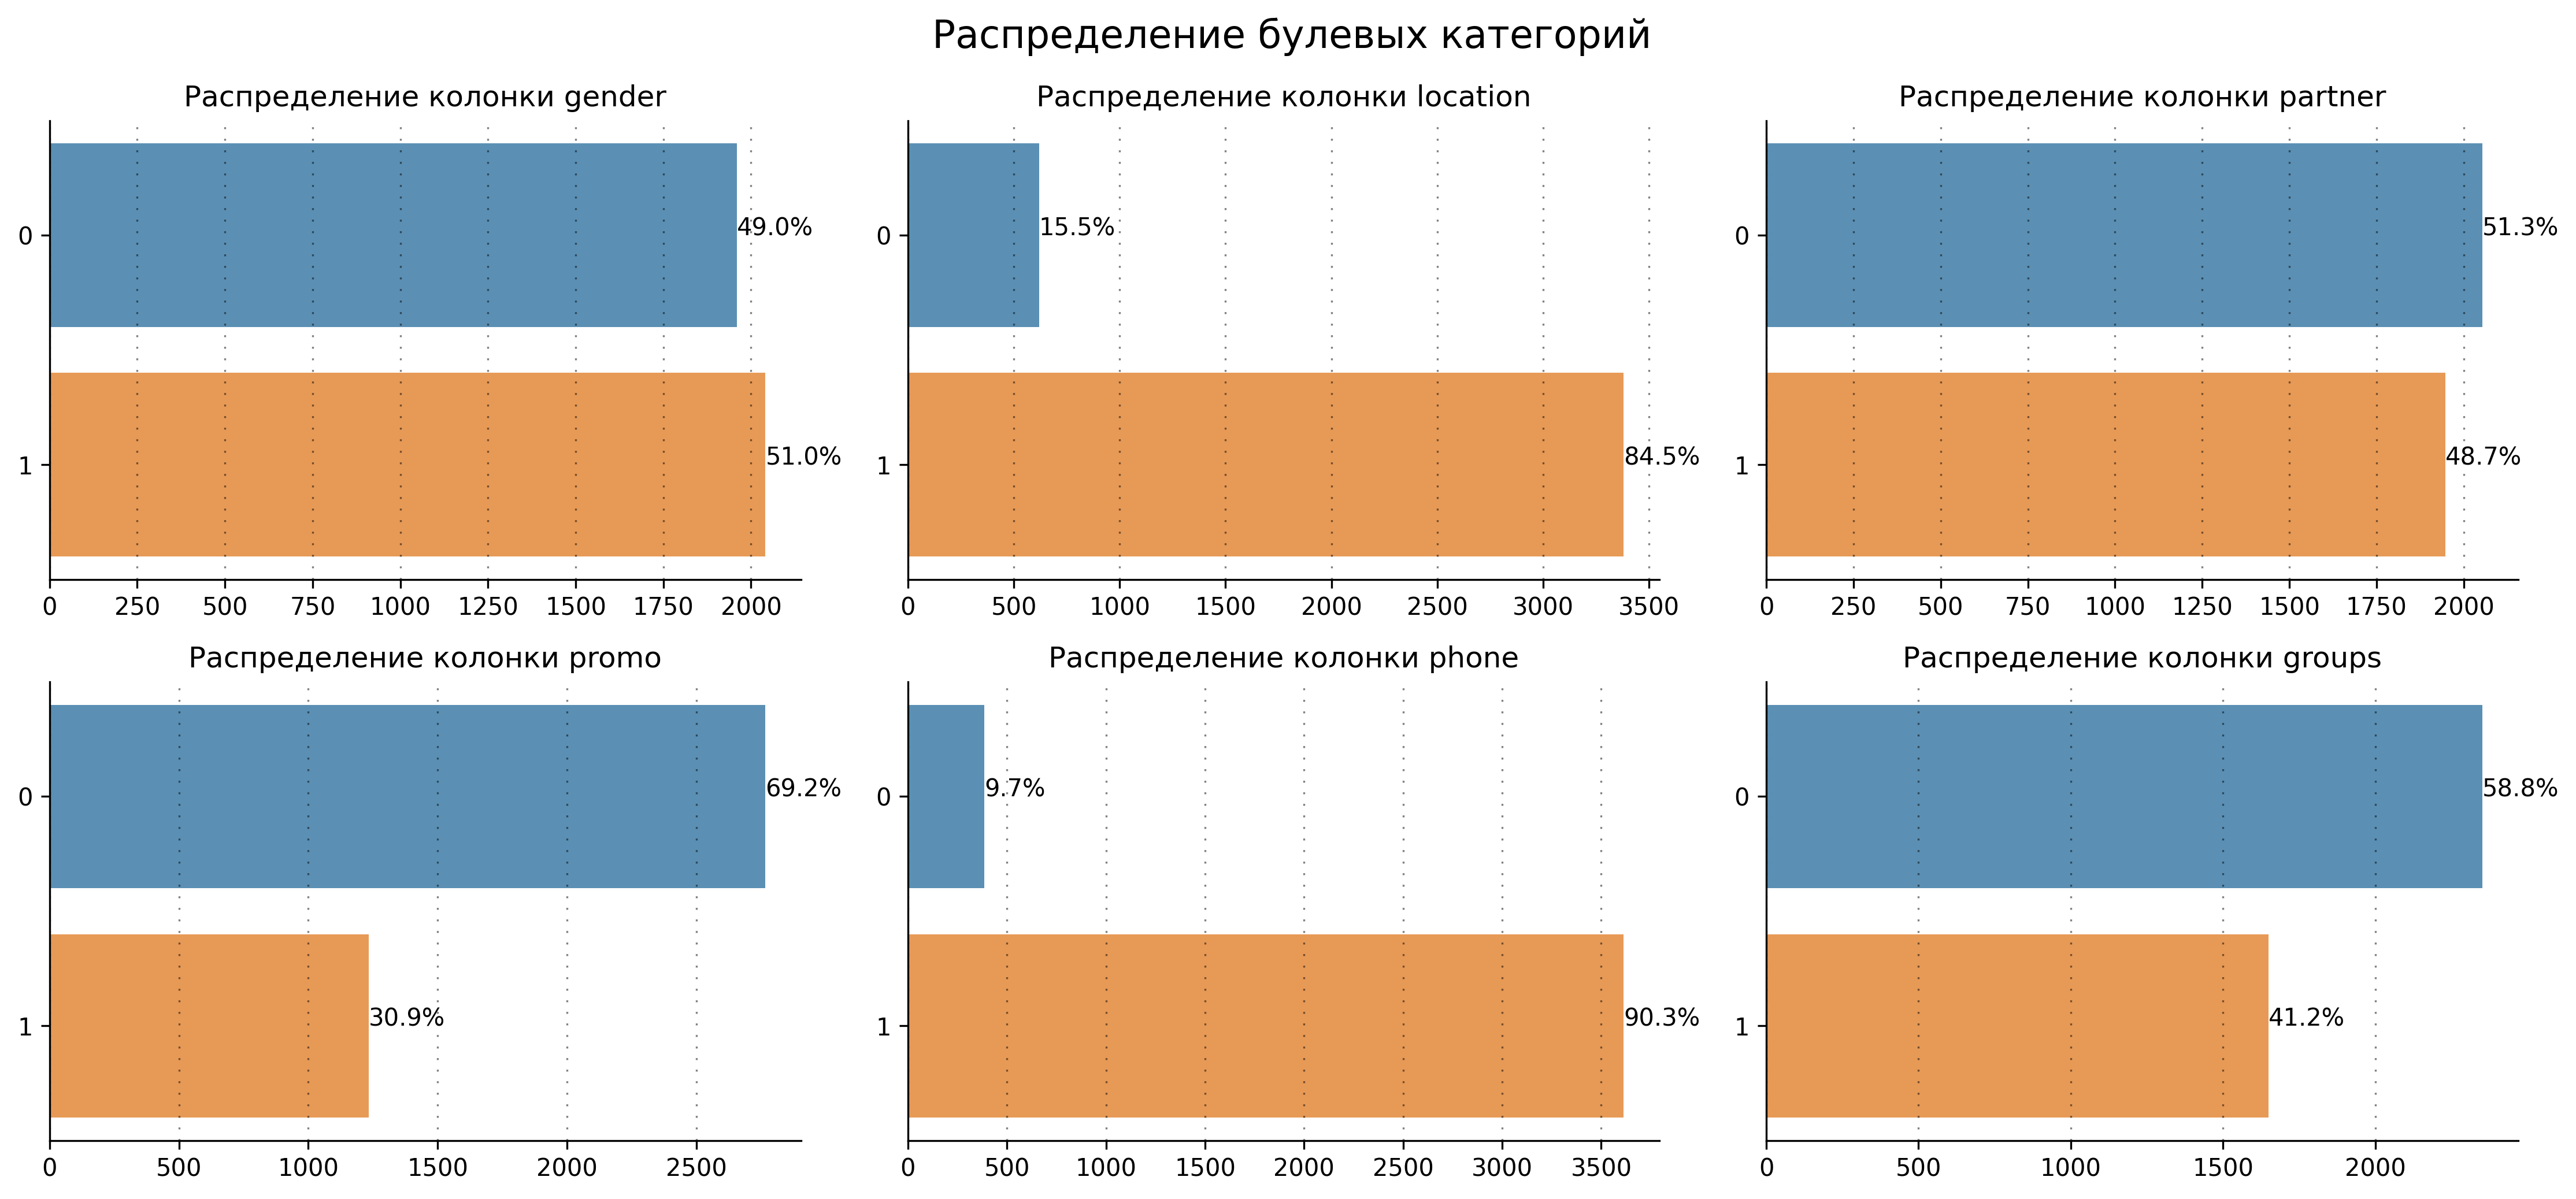

In [10]:
fig = plt.figure(figsize=(15, 7), dpi=150)
total = df.shape[0]
fig.suptitle('Распределение булевых категорий', fontsize=16)

for i, col in enumerate(bool_cols):
    ax = fig.add_subplot(2, 3, i+1)
    ax = sns.countplot(y=col, data=df, alpha=0.8)
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_title('Распределение колонки {}'.format(col))
    ax.set_xlabel('')
    ax.set_ylabel('')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

fig.tight_layout()
sns.despine()
plt.show()

Как видно из диаграммы, по полу клиенты распределены практически одинаквово. 84.5% процента пользователей проживают или работают в том же районе, что и фитнес-центр. Чуть меньше половины клиентов - корпоративные. Треть пользователей привели друзья. Интересно, а как указаны корпоративные клиенты в этой категории. Нужно посмотреть. Более 90% пользователей свой телефон оставили. Около 41% клиентов посещают групповые занятия.

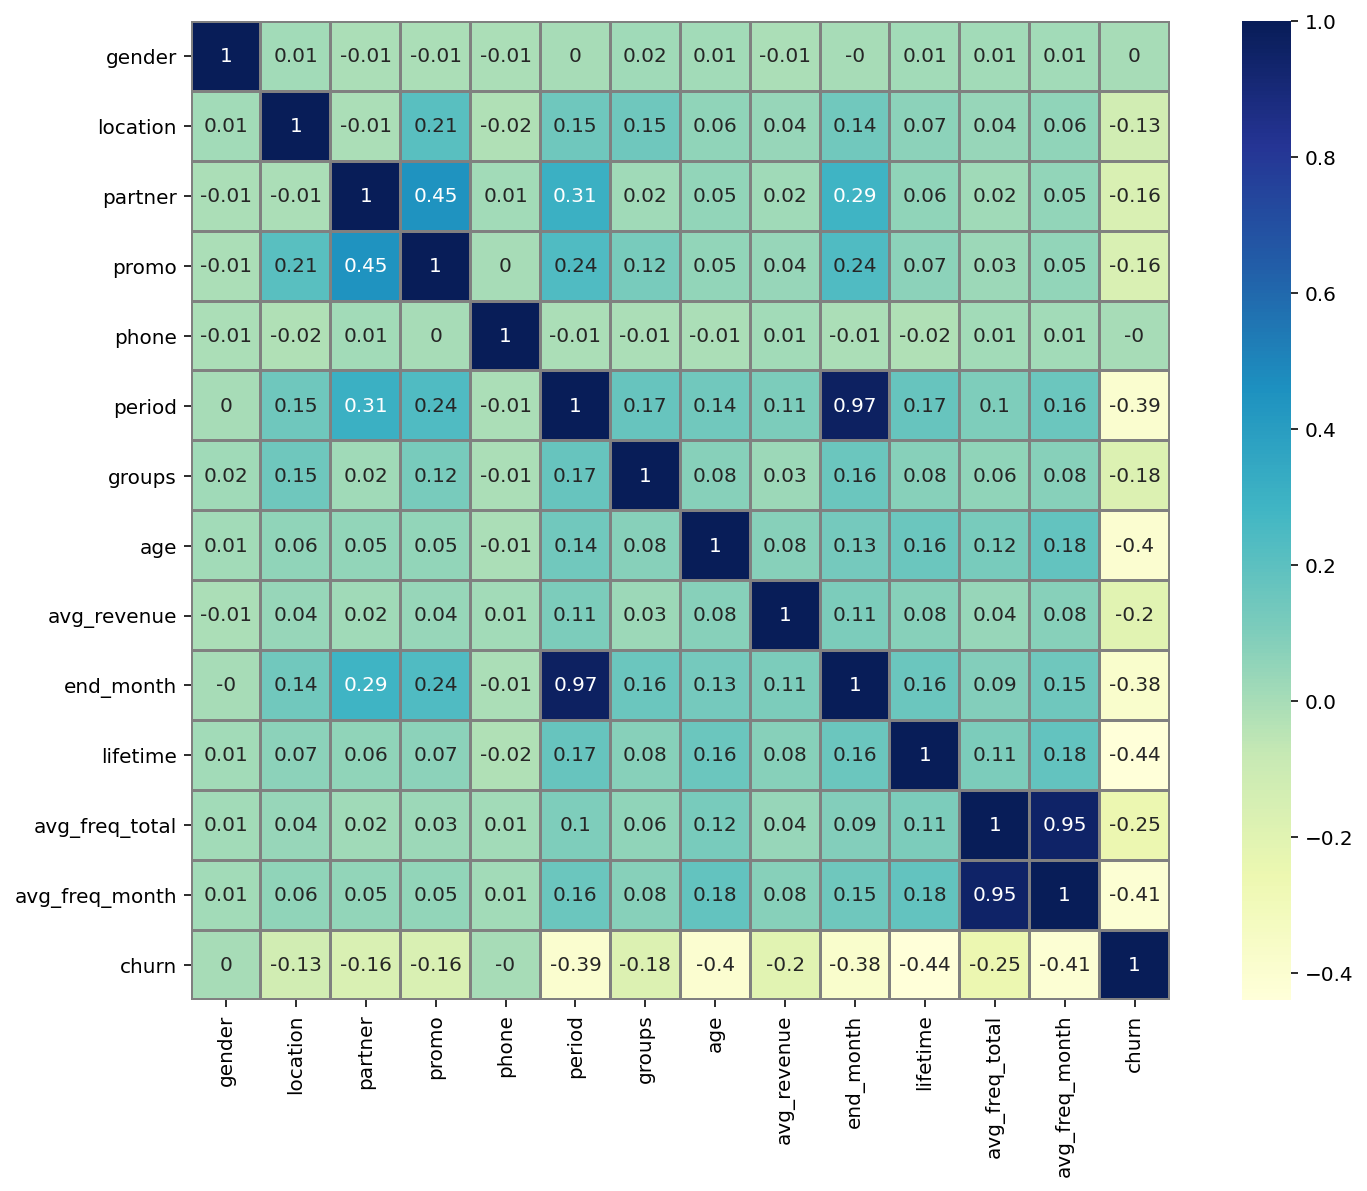

In [11]:
# посмотрю на корреляцию признаков
cm = df.corr().round(2)

plt.figure(figsize=(13, 9))
sns.heatmap(cm, annot = True, square=True, linewidths=1, linecolor='gray', cmap="YlGnBu",) 
plt.show()

Отток пользователей обратно коррелирует со всеми переменными, кроме пола и наличия контактного телефона (с ними коллеляция нулевая). 

Из сильно корелирующих признаков выделяю 2 пары, это:

- средние кол-ва посещений в неделю за месяц и за весь срок
- длительность абонемента и кол-во месяцов до истечения абонемента.

Кореляция в двух парах логична, а вот с самой переменной оттока заметны отрицательные корреляции со следующими признаками:

- продолжительнось посещения клиентом конкретный фитнес зал
- среднее кол-во посещений в неделю
- количество месяцев в абонементе
- возраст клиента

In [12]:
# сравню признаки ушедших и не ушедших
df_gr = (df.groupby('churn', as_index=False)[list(df.columns)]
         .mean()
         .drop('churn', axis=1)
         .T
         .rename(columns = {1: 'Ушли', 0: 'Остались'}))
df_gr

,Остались,Ушли
gender,0.51,0.51
location,0.87,0.77
partner,0.53,0.36
promo,0.35,0.18
phone,0.90,0.90
period,5.75,1.73
groups,0.46,0.27
age,29.98,26.99
avg_revenue,158.45,115.08
end_month,5.28,1.66


Можно сделать вывод, что:

   - в среднем 87% клиентов, проживающих или работающих в районе, где находится фитнес-центр, остаются клиентами клуба, а среди ушедших — таких 77%.
   - партнеры клуба получают клубные карты со скидкой, и остаются больше чем не партнеры, в среднем 53% клиентов сотрудников компании-партнёра клуба остались в клубе, а среди ушедших таких клиентов 36%
   - у "отточных" пользователей карта на более маленький срок. Более маленький срок это в среднем 1.73 месяц, против 5.75 у тех, кто остался.
   - ушедшие пользователи чаще всего новые пользователи, поэтому время их "жизни" в зале даже не более месяца. Пришли, посмотрели, не понравилось, ушли;
   - неушедшие чаще посещают групповые занятия. (есть клиенты, которые ходят только на групповые, например).  Оставшиеся посещали 2.03 раза в месяц, ушедшие 1.04. Это примерно на 49% больше. (это средняя частота посещений в неделю за предыдущий месяц)
   - ушедшие пользователи в среднем моложе и тратят меньше денег на дополнительные услуги. Лояные тратят в среднем 158 у.е., а ушедшие 115 у.е.;
   - у ушедших пользователей оставалось примерно 1-2 месяца до окончания абонемента, т.е. они покинули клуб не «доходя» свой абонемент ещё 1-2 месяца;
   - ушедшие реже посещают зал, в среднем они посещают 1.47 раз в неделю, но в месяц перед отказом ходят реже - 1.04 раза в неделю. Частота посещений уменьшается, что может стать сигналом к оттоку.
    
Из сильно корелирующих признаков выделяю 2 пары, это:

- средние кол-ва посещений в неделю за месяц и за весь срок
- длительность абонемента и кол-во месяцов до истечения абонемента.

Кореляция в двух парах логична, а вот с самой переменной оттока заметны отрицательные корреляции со следующими признаками:

- продолжительнось посещения клиентом конкретный фитнес зал
- среднее кол-во посещений в неделю
- количество месяцев в абонементе
- возраст клиента

  
  
Данные готовы для прогнозирования, дубликатов , пропусков нет, названия признаков приведены к удобному виду

## Построение моделей прогнозирования оттока клиентов

### Выбор модели

Построим и проанализируем модели бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце:

модель логистической регрессии - Logistic Regression
модель случайного леса - Random Forest Classifier
Предварительная стандартизая данных при построении настоящих моделей не является обязательной.

Разделим данные на признаки и целевую переменную. Разделим модель на обучающую и валидационную выборку:

In [13]:
# Разделение данных на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis =1)
y = df['churn']

# Разделение модели на обучающую и валидационную выборку (20/80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [14]:
tabs = [X_train, X_test, y_train, y_test]
for tab in tabs:
    print('размерность выборки', tab.shape)

размерность выборки (3200, 13)
размерность выборки (800, 13)
размерность выборки (3200,)
размерность выборки (800,)


Построим модель логистической регрессии:

In [15]:
# Создание алгоритма для модели логистической регрессии, регуляризация L1, С=1.0
model_LR = LogisticRegression(solver='liblinear', random_state=0, penalty='l1', C=1.0)

# Обучение модели
model_LR.fit(X_train, y_train)

# Воспользуемся обученной моделью, чтобы сделать прогнозы
predictions_LR = model_LR.predict(X_test)
probabilities_LR = model_LR.predict_proba(X_test)[:,1]

Построим модель случайного леса:

In [16]:
# Создание алгоритма для модели случайного леса
model_RF = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Обучение модели
model_RF.fit(X_train, y_train)

# Воспользуемся обученной моделью, чтобы сделать прогнозы
predictions_RF = model_RF.predict(X_test)
probabilities_RF = model_RF.predict_proba(X_test)[:,1]

Оценим метрики для обеих моделей на валидационной выборке для чего построим функцию расчета:

- Accuracy: доля правильных ответов
- Precision: точность
- Recall: полнота
- F1_score: баланс между Precision and Recall
- ROC_AUC: доля оценки качества классификатора
- Матрица ошибок:
    - Прогноз модели = 1, реальное значение = 1.
    Такие прогнозы называют True Positive ("истинно положительные") - сокращённо TP.
    - Прогноз модели = 1, реальное значение = 0.
    Такие прогнозы называют False Positive ("ложно положительные") - сокращённо FP.
    - Прогноз модели = 0, реальное значение = 1.
    Такие прогнозы называют False Negative ("ложно отрицательные") - сокращённо FN.
    - Прогноз модели = 0, реальное значение = 0.Такие прогнозы называют True Negative ("истинно отрицательные") - сокращённо TN.
        - У хорошей модели бóльшая часть прогнозов должна попадать в группы TP и TN.

In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title):
    print('\033[1m' + title + '\033[0m')
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    confusion_matrix(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_title('Матрица ошибок', fontweight='bold')
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Прогноз модели=0', 'Прогноз модели=1'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Реальное значение=0', 'Реальное значение=1'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

Метрики модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.89
	Recall: 0.86
	F1: 0.88
	ROC_AUC: 0.98


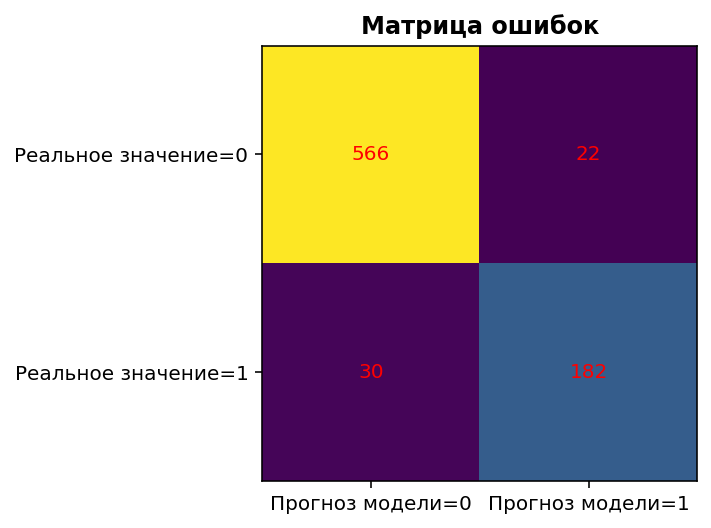

Метрики модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


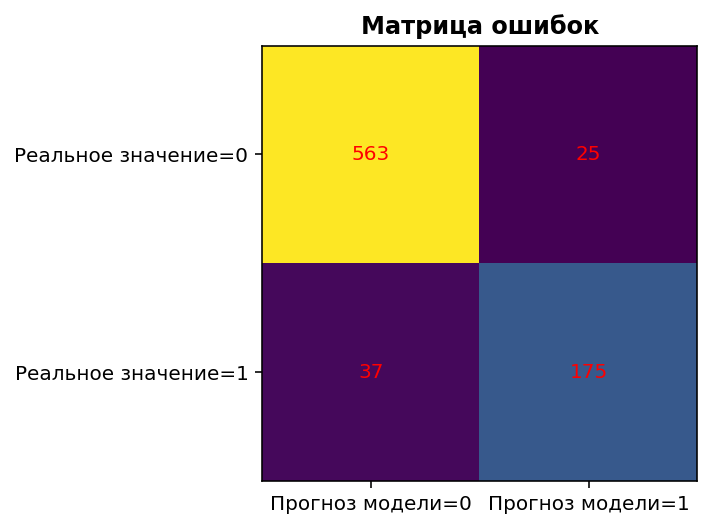

In [18]:
print_all_metrics(y_test, predictions_LR, probabilities_LR, 'Метрики модели логистической регрессии:')
print_all_metrics(y_test, predictions_RF, probabilities_RF, 'Метрики модели случайного леса:')

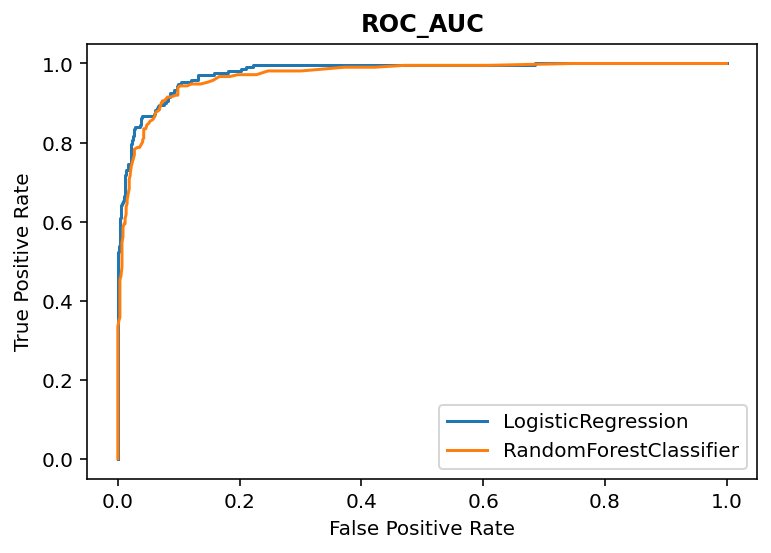

In [19]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, probabilities_LR)
plt.plot(fpr,tpr,label="LogisticRegression")
fpr, tpr, thresh = metrics.roc_curve(y_test, probabilities_RF)
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC', fontweight='bold')
plt.legend(loc=0)
plt.show()

Обе модели - логистической регрессии и случайного леса хорошо справляются с задачей прогнозирования оттока клиентов в следующем месяце. Модель логистической регрессии показала себя немного лучше модели случайного леса:

- доля правильных ответов 0,94
- точность 0,89
- полнота 0,86
- баланс между точностью и полнотой 0,88
- доля оценки качества классификатора 0,98, что видно и на графике площади под кривой ошибок (кривая логистической регрессии ближе к верхнему левому углу)
- матрица ошибок содержит большее количество "истинно положительных" (566) и "истинно отрицательных" (182) прогнозов.

Произведем оценку важности признаков для модели логистической регрессии:

In [20]:
feature_LR = pd.DataFrame({'Признак': X.columns, 'Важность': abs(model_LR.coef_[0])})
feature_LR.sort_values(by='Важность', ascending=False).reset_index(drop=True)

,Признак,Важность
0,avg_freq_month,4.40
1,avg_freq_total,3.62
2,lifetime,1.01
3,groups,0.81
4,age,0.34
5,promo,0.31
6,period,0.17
7,end_month,0.14
8,partner,0.09
9,location,0.08


Вывод
Анализ моделей бинарной классификации клиентов - логистической модели и модели случайного леса, где целевой признак - факт оттока клиента в следующем месяце показал лучшую точность логистической модели для составления прогноза.

На прогноз оттока клиентов из фитнес-центра наибольшее влияние оказывают следующие признаки:

- средняя частота посещений в неделю за предыдущий месяц
- средняя частота посещений в неделю за все время с начала действия абонемента
- время с момента первого обращения в фитнес-центр (в месяцах)

## Кластеризация клиентов сети фитнес-центра

In [29]:
# Стандартизация данных
sc = StandardScaler() 
# Обучение нормализатора и преобразование набора данных
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму:

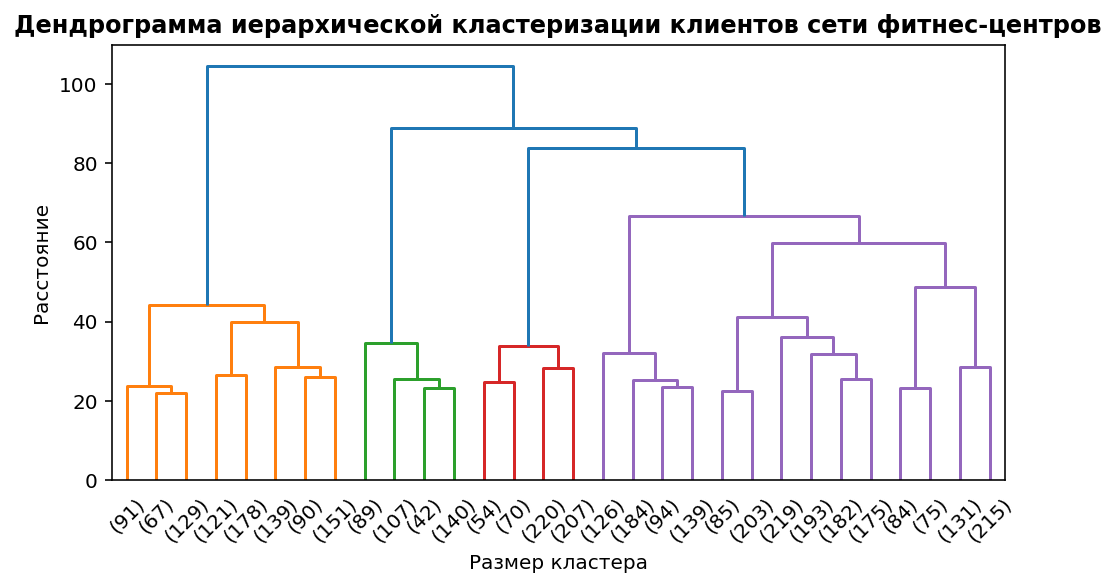

In [30]:
# Построение матрицы расстояний
linked = linkage(X_sc, method = 'ward')

# Построение дендрограмы
plt.figure(figsize=(8, 4))  
dendrogram(linked, truncate_mode='lastp')
plt.title('Дендрограмма иерархической кластеризации клиентов сети фитнес-центров', fontweight='bold')
plt.xlabel("Размер кластера")
plt.ylabel("Расстояние")
plt.show() 

Обучу модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов, количество кластеров возьму 5.

In [31]:
# задаю модель k_means с количеством кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# спрогнозирую кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраню метки кластера в поле нашего датасета
df['cluster'] = labels

# посчитаю метрику силуэта для нашей кластеризации
print('Метрика силуэта: {:.2f}'.format(silhouette_score(X_sc, labels) ))

Метрика силуэта: 0.14


Значение метрики силуета оказалось не очень высоким, но исходя из ксластеризации это и ожидаемо.

Посмотрю на средние значения признаков для кластеров.

In [32]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
period,10.89,4.79,2.35,1.95,2.67
groups,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_revenue,160.76,143.96,135.46,131.62,161.66
end_month,9.95,4.48,2.20,1.86,2.46


Кластер 0:

    Большенство(96%) проживают или работают в районе, где находится фитнес-центр,
    Большая доля(78%)клиентов это сотрудники компаний-партнёров клуба
    Большенство (57%) использовали промо-код от знакомого при оплате первого абонемента
    Средния признак длительности текущего действующего абонемента близок к 11 месяцам.
    И средний параметр по сроку до окончания абонемента высокий, почти 10 месяцев.
    В этом кластере средние затраты клиентов на сторонние услуги почти самые высокие по сравнению с другими кластерами.
    Соотвественно и отток в этом клестере минимальный всего 3 % из попавших в нее клиентов.
    
Кластер 1:

    Особенность этого кластера что клиенты не дают номер телефона, в остальном кластер с очень средними признаками.
    
Кластер 2:

    Все клиенты в этом кластере проживают или работают в другом районе, от фитнес-центра
    Самая минимальная доля клиентов (8%) по сравнению с другими кластерами кто использовал промо-код от знакомого при оплате первого абонемента.
    Самая минимальная доля клиентов (22 %) по сравнению с другими кластерами кто посещет груповые занятия
    
Кластер 3:

    В этом кластере клиенты реже других кластеров посещают фитнес зал, в среднем один раз в неделю.
    Самая большая доля (51 %) оттока по сравнению с другими кластерами.
    
Кластер 4:

    Клиенты же в этом кластере напротив, в среднем посещают фитнес зал почти в три раза чаще чем это делают клиенты из 3 кластера.
    Маленькое кол-во клиентов которые ушли (6 %)
    Построю распределения признаков для кластеров.

In [33]:
# Качественные переменные
qualitative_variables = ['gender', 'location', 'partner', 'promo', 'phone', 'groups', 
                         'period', 'churn']
# Количественные переменные
quantitative_variables = ['age', 'avg_revenue', 'avg_freq_total', 'avg_freq_month', 'lifetime', 'end_month']


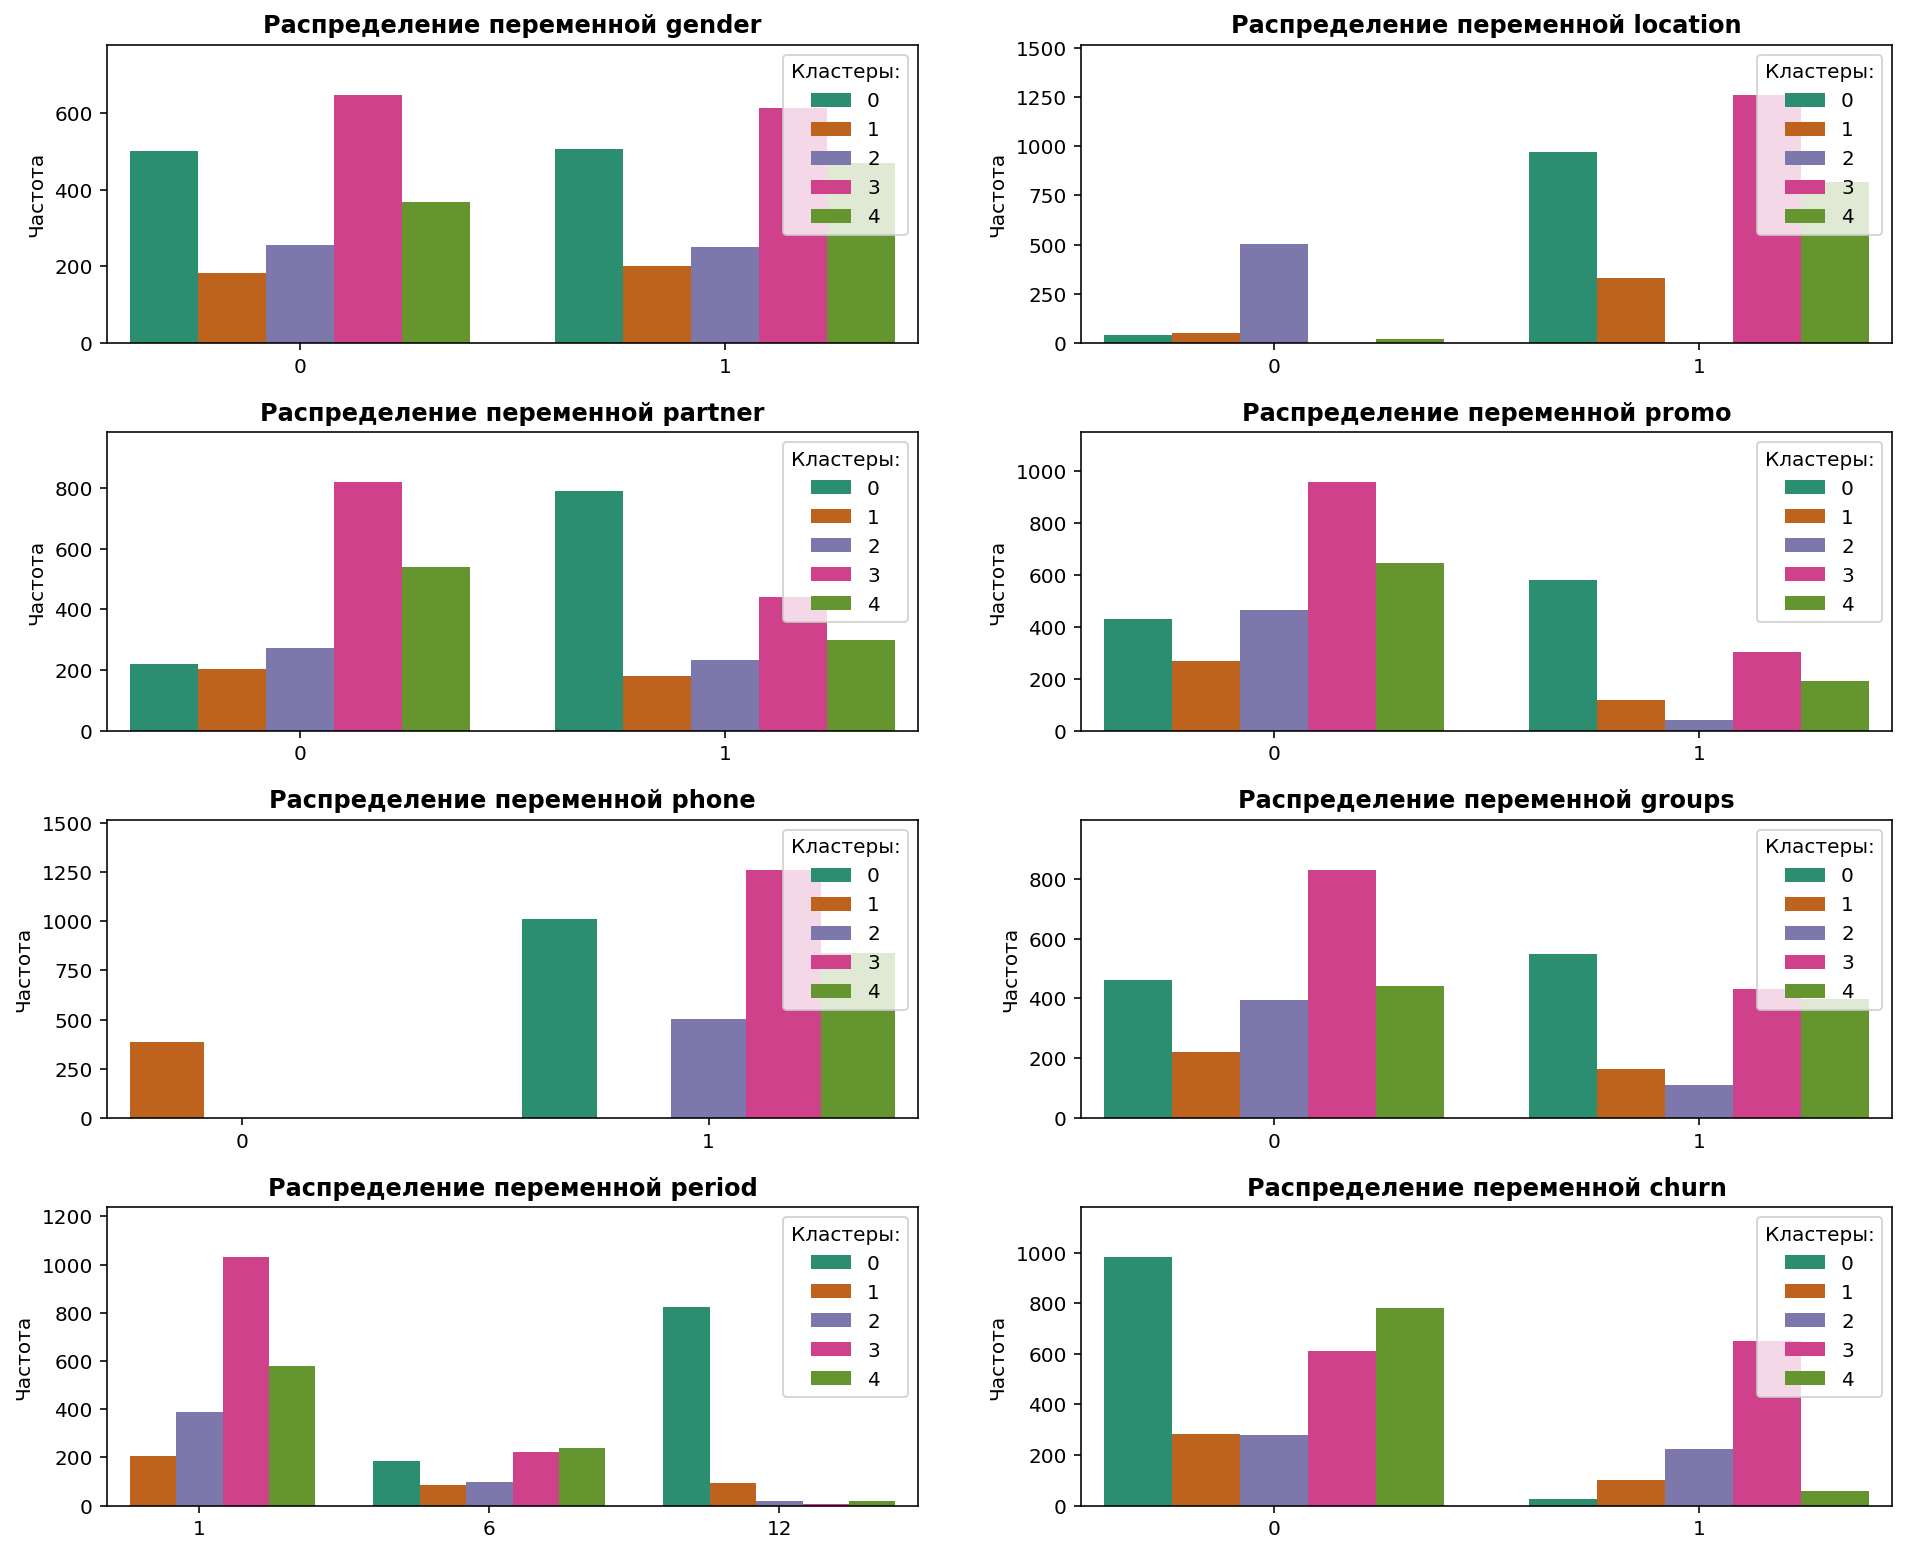

In [37]:

columns_cl = qualitative_variables
fig=plt.figure(figsize=(16,17))
for i, column_cl in enumerate(columns_cl):
    ax_qual_cl = fig.add_subplot(5,2,i+1)
    sns.countplot(x=column_cl, hue='cluster', data=df, palette='Dark2')
    ax_qual_cl.margins(0.03, 0.2)
    ax_qual_cl.legend(title='Кластеры:', labels=[0, 1, 2, 3, 4], loc='upper right')
    plt.title('Распределение переменной ' + column_cl, fontweight='bold') 
    plt.xlabel('')
    plt.ylabel('Частота')
    plt.subplots_adjust(hspace=0.3)
plt.show()

## Графики визуализируют ранее описанные профили клиентов сети фитнес-центров "Культурист-датасаентист":

    количество женщин и мужчин в каждом из кластеров распределено равномерно и пропорционально размеру кластера,
    большая часть клиентов проживает или работает в районе фитнес-центра, кроме кластера 2, 100% клиентов которого живут и работают далеко от расположения фитнес-центра,
    по партнерской программе приходят преимущественно клиенты кластера 0,
    по рекомендации друзей приходят чаще клиенты кластера 0,
    большинство клиентов оставляют свой номер телефона для обратной связи, кроме клиентов кластера 1, 100% которых не оставили номер для контактной связи,
    групповые занятия чаще посещают клиенты кластеров 0, 3 и 4,
приобретают абонементы:

    короткие на 1 месяц чаще клиенты кластеров 1, 2, 3 и 4,
    на 6 месяцев некоторое количество пользователей всех пяти кластеров,
    на 12 месяцев клиенты кластера 0, реже кластера 1 и крайне редко клиенты других кластеров,
    действие большинства абонементов закончится пропорционально сроку, который действует абонемент, что было ранее подверждено наличием сильной корреляции между этими двумя пременными.
    
    
Высокий отток клиентов отмечается в кластерах 2 и 3, низкий в кластерах 0 и 4.

Построим графики распределения количественных признаков (ящики с усами) для каждого кластера:

In [62]:
sns.set_style('whitegrid')

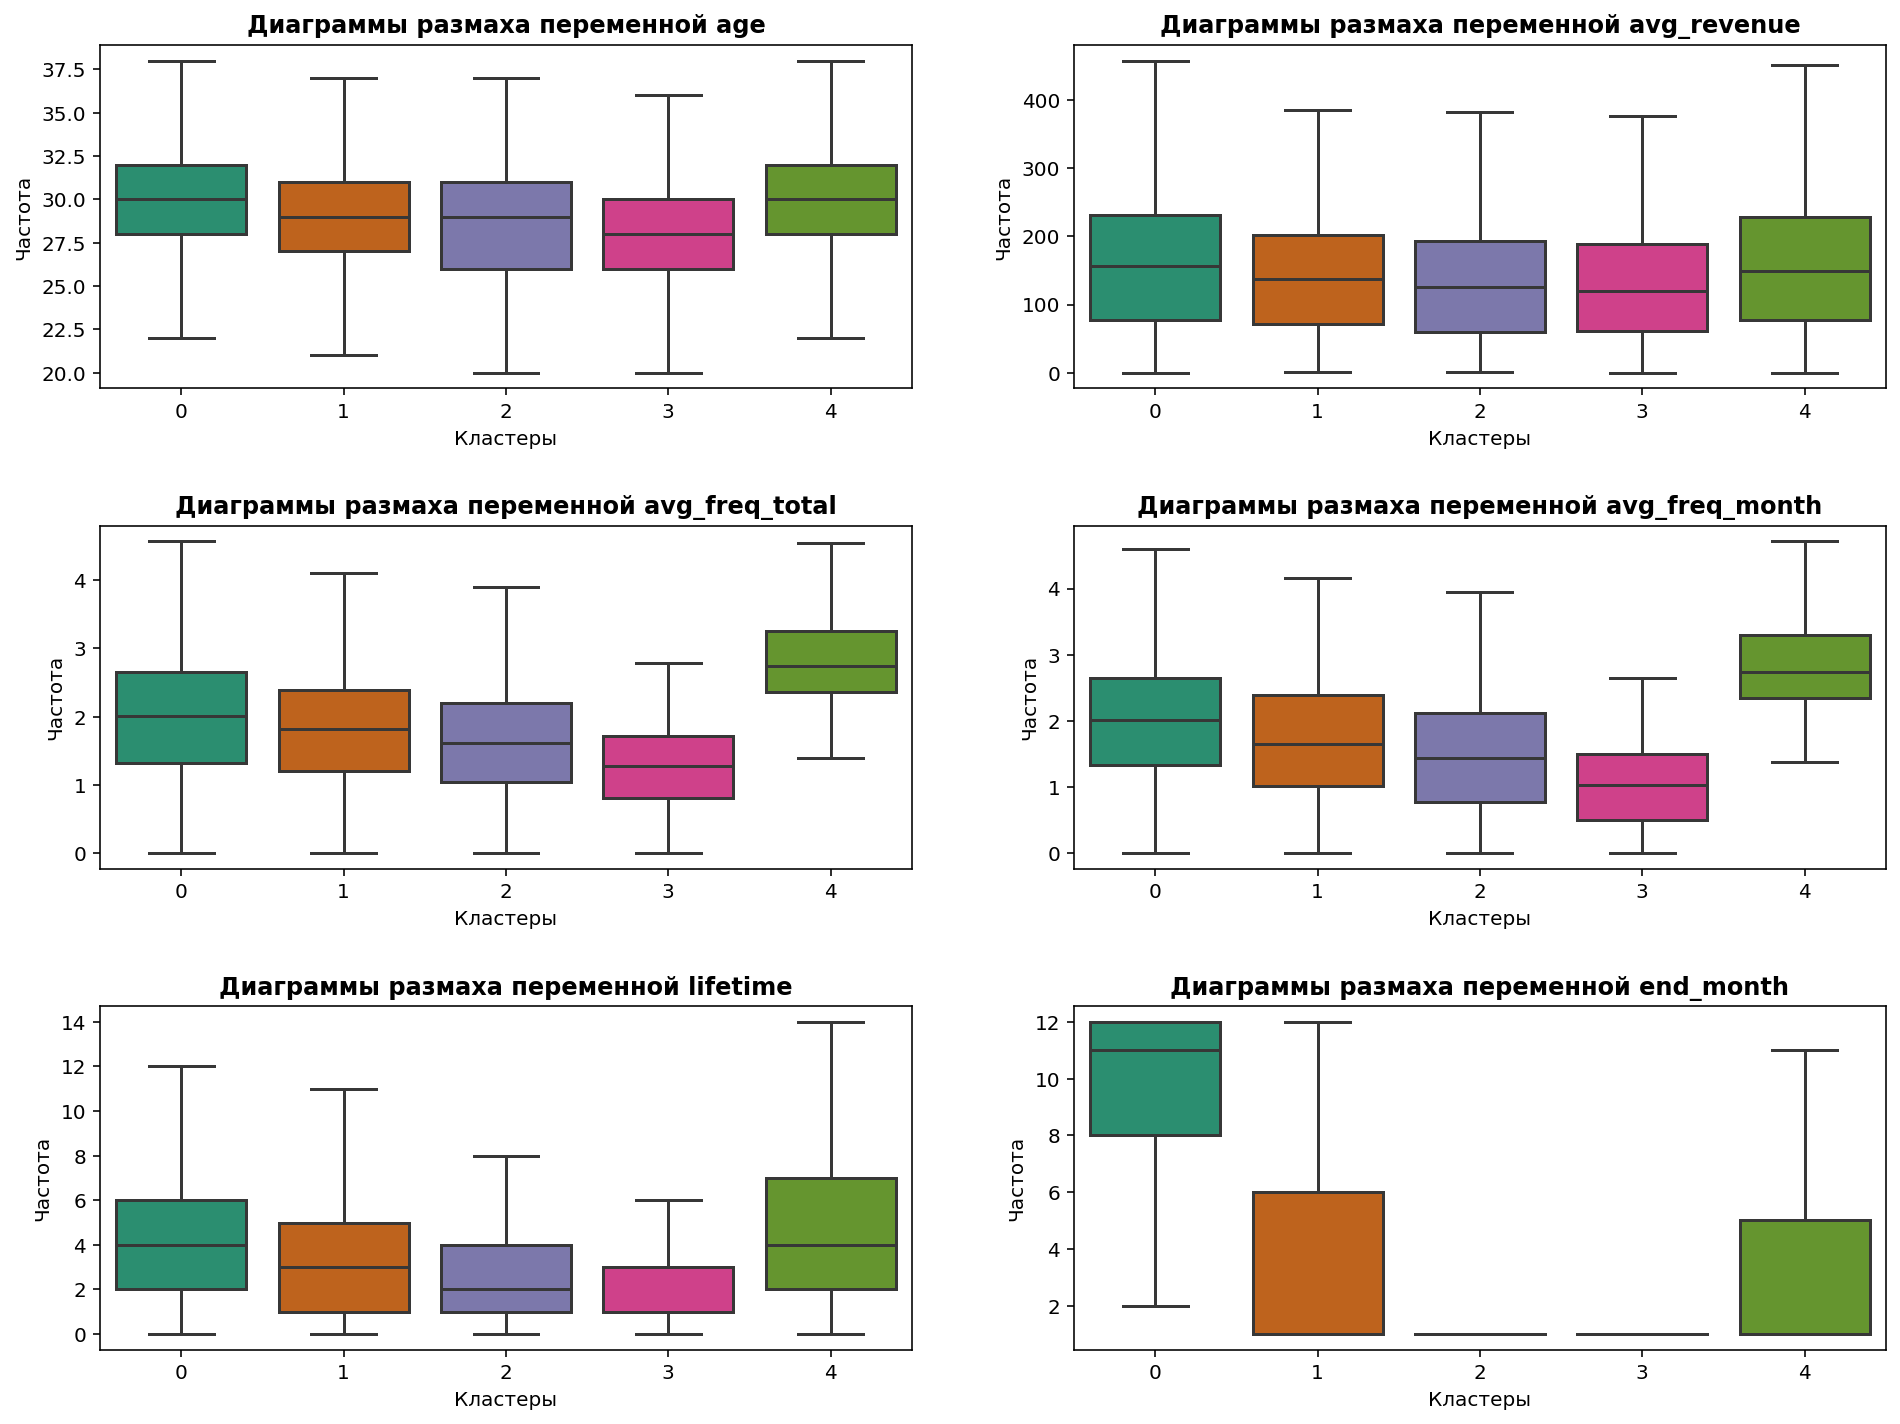

In [38]:
fig=plt.figure(figsize=(16,12))
for i, column_cl in enumerate(quantitative_variables):
    ax_quan_cl=fig.add_subplot(3,2,i+1)
    sns.boxplot(x=df['cluster'], y=df[column_cl], palette='Dark2', showfliers=False)
    plt.title('Диаграммы размаха переменной ' + column_cl, fontweight='bold') 
    plt.xlabel('Кластеры')
    plt.ylabel('Частота')
    plt.xticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
    plt.subplots_adjust(hspace=0.4)
plt.show()

Количественные признаки распределены по кластерам следующим образом:

    клиенты распределены по кластерам относительно возраста пропорционально, с минимальным средним значением в кластере 3 и максимальным - кластере 4,
    клиенты кластера 0 и 4 тратят на дополнительные услуги больше, чем клиенты кластера 2 и 3,
    частота посещения фитнес-центра составляет для кластера 1 и 2 - 1-2 раза в неделю, кластера 3 - 1 раз в неделю и для кластера 4 - 2-3 раза в неделю.
    клиенты кластера 4 и 0 ходят дольше остальных, в среднем 4 месяца
    клиенты кластеров 2 и 3 почти не ходят в последний месяц
    
    
Рассчитаем для каждого кластера долю оттока:

In [37]:
gch = df.groupby('cluster').mean().reset_index()[['cluster', 'churn']]
gch['cluster'] = gch['cluster']
gch['churn'] = gch['churn'].map(lambda x: '{:.1%}'.format(x))
gch.rename(columns={'cluster': 'Кластеры', 'churn': 'Доля оттока'})

,Кластеры,Доля оттока
0,0,2.8%
1,1,26.8%
2,2,44.4%
3,3,51.4%
4,4,6.8%


Высокий отток клиентов отмечается в кластерах 2 и 3, умеренный в кластере 1 и низкий в кластерах 0 и 4, которых можно назвать надежными.

Вывод

С помощью модели кластеризации данных нам удалось определить 5 профилей клиентов сети фитнес-центров "Культурист-датасаентист":

- Клиенты кластера 0 (31,6%) являются надежными клиентами (доля оттока 2,8%), которые пришли по партнерской программе или рекомендации друзей. Их высокая лояльность обусловлена удобством локации, вероятно стоимостью абонемента (партнерские скидки), социальными связями с друзьями, коллегами и одногруппниками. Клиенты данного кластера обладают высокой мотивацией о которой свидетельствует приобретение абонементов с длительным сроком действия (6 и 12 месяцев) и посещаемость занятий - 2 раза в неделю. Кроме того, клиенты кластера активно пользуются дополнительными услугами фитнес-центра.
- Клиенты кластера 1 (25,3%) соответствуют среднестатистическому профилю:
    1) 86,2% клиентов кластера живут или работают в локации фитнес-центра, что немного ниже прочих кластеров,
    2) 47% клиентов пришли по партнерским программам и 31,6% по рекомендации друзей,
    3) клиенты приобретают абонементы сроком действия на 1 месяц, реже на 6 и 12 месяцев,
    4) часто выбирают групповые тренировки - 42,6%,
    5) умеренно тратят на дополнительные услуги 143,9 у.е.,
    6) посещают занятия 1-2 раза в неделю,
    7) основной характеристикой, выделяющей данный кластер на фоне прочих, является отсутствие контактного телефона. Возможно предпочитают получать информацию по другим каналам - электронная почта, социальные сети.
    8) Доля оттока клиентов данного кластера находится на среднестатистическом значении - 26,8%.
- Клиенты кластера 2 (20,9%) проживают или работают далеко от локации фитнес-центра. Клиенты часто приходят по партнерским программам - 46,3% и предпочитают абонементы сроком на 1, 6 месяцев. Фактор локации играет ключевую роль для клиентов данного кластера и негативно сказывается на посещаемости занятий - 1-2 раза в неделю. Предпочтение клиенты отдают индивидуальным тренировкам, что может свидетельствовать о выборе определенного тренера или уникальной программы. Дополнительными услугами пользуются редко. Доля оттока клиентов данного кластера высока - 44,4%.
- Клиенты 3 кластера (12,6%) относятся к самым ненадежным - доля оттока составляет 51,4%. Проживают или работают рядом с фитнес-центром. В 35% случаев приходят по партнерским программам и в 24% случаев по рекомендации друзей. Приобретают абонементы на 1, реже на 6 месяцев, посещают занятия не чаще 1 раза в неделю и быстро прекращают их посещать. Клиенты вероятно имеют низкую мотивацию к занятиям спортом. Дополнительными услугами пользуются редко.
- Клиенты кластера 4 (9,6%) также относятся к надежным и постоянным клиентам - доля оттока 6,8%. Как и клиенты из 3 кластера 35,6% пришли по партнерской программе и 22,9% по рекомендации друзей. Предпочитают абонементы со сроком действия 1, реже 6 месяцев. Крайне редко приобретают абонементы на 1 год. Предпочитают групповые занятия (47,3%). На тренировки приходят регулярно 2-3 раза в неделю, что свидетельствует о высокой мотивации к занятию спортом. Тратят больше, чем клиенты других кластеров на дополнительные услуги - 161,7 у.е.

## Вывод

1. Предоставленный датасет был без выбросов пропусков и дубликатов, перед анализом названия столбцов были приведены к нижнему регистру

2. На этапе анализа групп клиентов которые остаются в клубе или уходят, были выявлены зависимости с признакоми которые клияют останеться клиентв клуббе или нет:

- близость к фитнес клубу
- друзья которые привели самого клиента в клуб
- длительность текущего абанемента
- посещает ли груповые занятие клиент
- возраст клиента
- сумма выручки от клиента на доп услуги
- как давно клиент посещает конкретный фитнес зал
- средняя частота посещений

Матрица корреляции подтверждает зависимость основной переменной(оттока) со следующими признаками:

- продолжительнось посещения клиентом конкретный фитнес зал
- среднее кол-во посещений в неделю
- количество месяцев в абонементе
- возраст клиента
3. На этапе прогнозирования оттока, обучил модели "Логистическая регрессия" и "Случайный лес", обе модели показали высокие результаты а именно:

Метрики модели логистической регрессии:

	Accuracy: 0.94
	Precision: 0.89
	Recall: 0.86
	F1: 0.88
	ROC_AUC: 0.98

Метрики модели случайного леса:

	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97

С помощью модели кластеризации данных нам удалось определить 5 профилей клиентов сети фитнес-центров "Культурист-датасаентист":

- Клиенты кластера 0 (31,6%) являются надежными клиентами (доля оттока 2,8%), которые пришли по партнерской программе или рекомендации друзей. Их высокая лояльность обусловлена удобством локации, вероятно стоимостью абонемента (партнерские скидки), социальными связями с друзьями, коллегами и одногруппниками. Клиенты данного кластера обладают высокой мотивацией о которой свидетельствует приобретение абонементов с длительным сроком действия (6 и 12 месяцев) и посещаемость занятий - 2 раза в неделю. Кроме того, клиенты кластера активно пользуются дополнительными услугами фитнес-центра.
- Клиенты кластера 1 (25,3%) соответствуют среднестатистическому профилю:
    1) 86,2% клиентов кластера живут или работают в локации фитнес-центра, что немного ниже прочих кластеров,
    2) 47% клиентов пришли по партнерским программам и 31,6% по рекомендации друзей,
    3) клиенты приобретают абонементы сроком действия на 1 месяц, реже на 6 и 12 месяцев,
    4) часто выбирают групповые тренировки - 42,6%,
    5) умеренно тратят на дополнительные услуги 143,9 у.е.,
    6) посещают занятия 1-2 раза в неделю,
    7) основной характеристикой, выделяющей данный кластер на фоне прочих, является отсутствие контактного телефона. Возможно предпочитают получать информацию по другим каналам - электронная почта, социальные сети.
    8) Доля оттока клиентов данного кластера находится на среднестатистическом значении - 26,8%.
- Клиенты кластера 2 (20,9%) проживают или работают далеко от локации фитнес-центра. Клиенты часто приходят по партнерским программам - 46,3% и предпочитают абонементы сроком на 1, 6 месяцев. Фактор локации играет ключевую роль для клиентов данного кластера и негативно сказывается на посещаемости занятий - 1-2 раза в неделю. Предпочтение клиенты отдают индивидуальным тренировкам, что может свидетельствовать о выборе определенного тренера или уникальной программы. Дополнительными услугами пользуются редко. Доля оттока клиентов данного кластера высока - 44,4%.
- Клиенты 3 кластера (12,6%) относятся к самым ненадежным - доля оттока составляет 51,4%. Проживают или работают рядом с фитнес-центром. В 35% случаев приходят по партнерским программам и в 24% случаев по рекомендации друзей. Приобретают абонементы на 1, реже на 6 месяцев, посещают занятия не чаще 1 раза в неделю и быстро прекращают их посещать. Клиенты вероятно имеют низкую мотивацию к занятиям спортом. Дополнительными услугами пользуются редко.
- Клиенты кластера 4 (9,6%) также относятся к надежным и постоянным клиентам - доля оттока 6,8%. Как и клиенты из 3 кластера 35,6% пришли по партнерской программе и 22,9% по рекомендации друзей. Предпочитают абонементы со сроком действия 1, реже 6 месяцев. Крайне редко приобретают абонементы на 1 год. Предпочитают групповые занятия (47,3%). На тренировки приходят регулярно 2-3 раза в неделю, что свидетельствует о высокой мотивации к занятию спортом. Тратят больше, чем клиенты других кластеров на дополнительные услуги - 161,7 у.е.


## Рекомендации

1. Уделить больше внимания кластерам 2, 3

    Клиенты из 2 кластера живут далеко, но готовы приезжать на индивидуальные занятия, как только они начинают реже ходить, нужно им делать специаное предложение, для поднятия мотивации
    3 кластер приходит чаще всего по рекомендации или партнерской программе и живут рядом. Хорошо было бы сделать для них персональную скидку, чтобы они смогли купить абонемент на более длительный срок, и делать скидки на доп услуги, чтобы чаще их брали.

2. Обращать внимание на клиентов, которые стали реже ходить или вообще перестали. возможно это будет именно то время, когда они решают больше не ходить в зал. для них можно сделать какой-то подарок в виде индивидуальной тренировки или массажа.

3. Для клиентов кто живет рядом, можно сделать мотивационные активности, например занятия спортом на улице в ближайшем парке и т.д.

Самое главное в моих рекомендациях - это уловить именно тот момент, когда улиент решает уйти, а в нашем случае - это примерно 1,5 -2 мсяца до конца срока действия абонемента.